In [1]:
import tensorflow as tf
import os

2024-07-23 13:37:43.463271: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-23 13:37:43.494776: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 13:37:43.494801: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 13:37:43.494809: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-23 13:37:43.500403: I tensorflow/core/platform/cpu_feature_g

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

2024-07-23 13:37:45.738715: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-07-23 13:37:45.738740: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: pop-os
2024-07-23 13:37:45.738787: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: pop-os
2024-07-23 13:37:45.738919: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 550.67.0
2024-07-23 13:37:45.738935: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 550.67.0
2024-07-23 13:37:45.738937: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 550.67.0


In [3]:
tf.config.list_physical_devices('GPU')

[]

Remove dodgy images

In [14]:
import cv2
import imghdr
import fnmatch
import re

In [5]:
data_dir = 'data'
image_ext = ['jpg', 'jpeg', 'png', 'bmp']

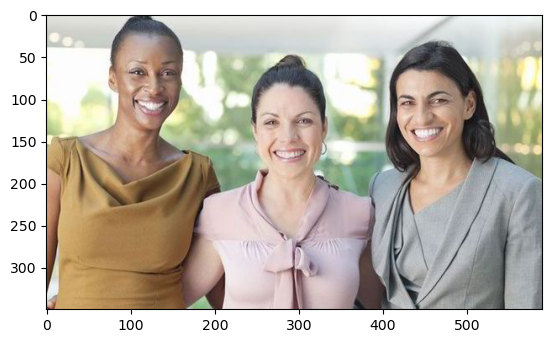

In [6]:
# Example image from dataset
from matplotlib import pyplot as plt
img = cv2.imread(os.path.join('data', 'happy', '1-2.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
allowed_patterns = re.compile(r'^(image|happ|sad).*')

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        if not allowed_patterns.match(image):
            print(f"Image does not match allowed patterns: {image_path}")
            os.remove(image_path)
        else:
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_ext:
                    print(f"Image not in ext list {image_path}")
                    os.remove(image_path)
            except Exception as e:
                print(f"Issue with image {image_path}: {e}")

Image does not match allowed patterns: data/happy/hqdefault.jpg
Image does not match allowed patterns: data/happy/brady-bunch-3.jpg
Image does not match allowed patterns: data/happy/getty_505175324_2000131020009280246_158016.jpg
Image does not match allowed patterns: data/happy/Happy-people-raise-happy-kids-raise-yourself-first.jpg
Image does not match allowed patterns: data/happy/How_Happy_Are_People_at_Work.jpg
Image does not match allowed patterns: data/happy/bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
Image does not match allowed patterns: data/happy/blog_image_20180219221810890.jpg
Image does not match allowed patterns: data/happy/GettyImages-565706549-949x534.jpg
Image does not match allowed patterns: data/happy/11-Habits-of-Truly-Happy-People.jpg
Image does not match allowed patterns: data/happy/8cxKy5g9i.jpg
Image does not match allowed patterns: data/happy/1HEoLBLidT2u4mhJ0oiDgig.png
Image does not match allowed patterns: data/happy/Screen-Shot-2012-10-23-a

Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 0 files belonging to 2 classes.


ValueError: No images found in directory data. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')